<a href="https://colab.research.google.com/github/anhhaibkhn/LeetCode_Daily_Challenges/blob/master/SepLeetCodePart1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

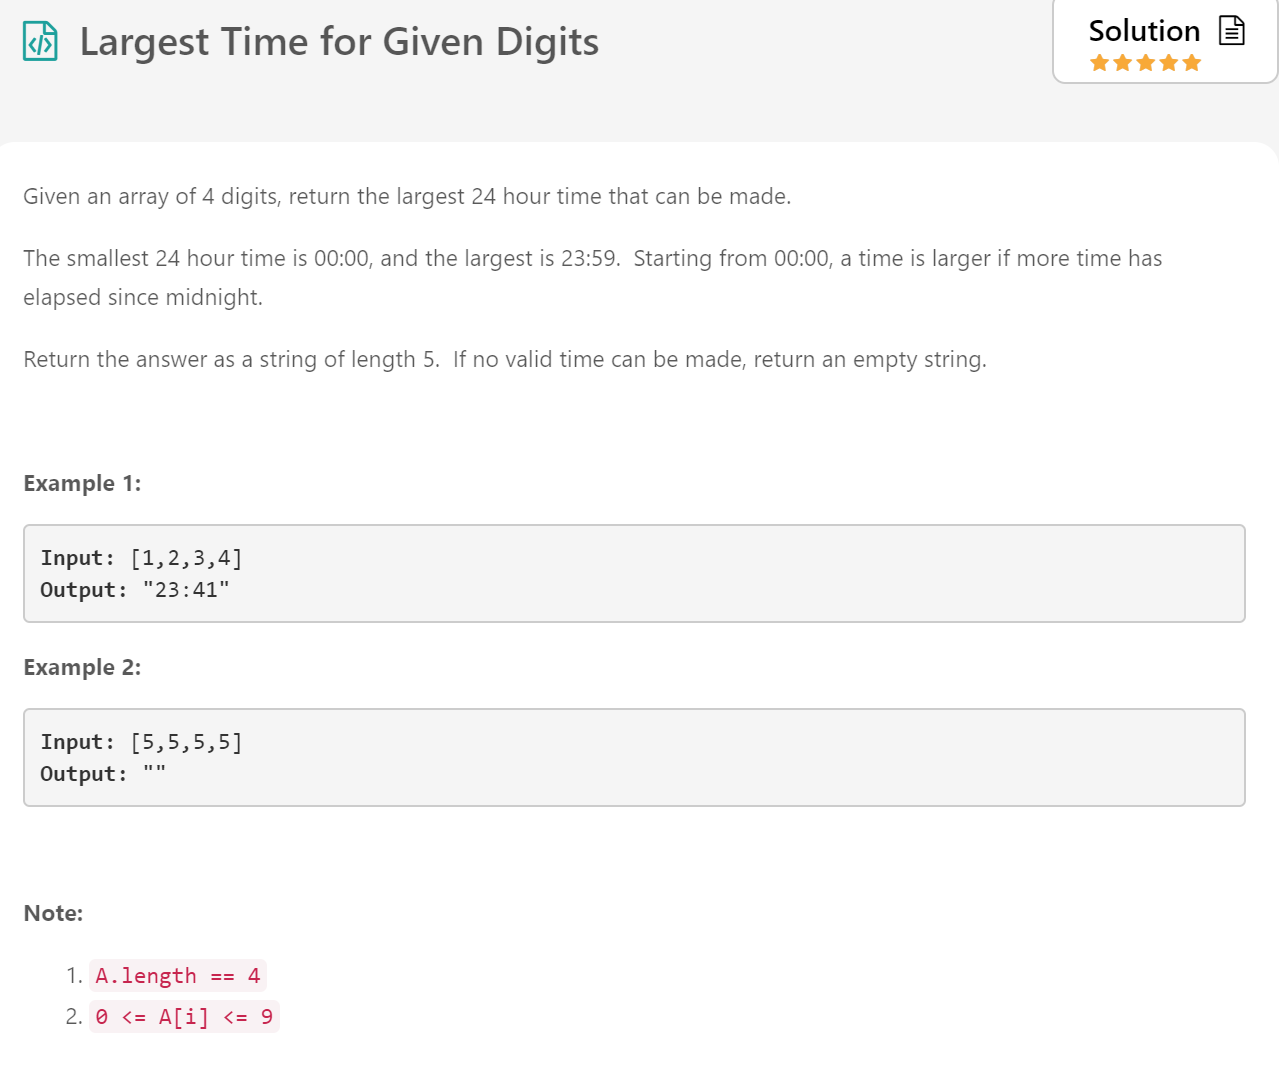

In [ ]:
# Sep 1, Largest Time for Given Digits
# my solution 
import itertools   
class Solution:
    def largestTimeFromDigits(self, A: List[int]) -> str:
        ret = ''
        temp = []   
        permu = list(itertools.permutations(A))
        
        # get all validated combination
        for num in permu:
            hr = num[0]*10 + num[1]
            mn = num[2]*10 + num[3]
            if hr >= 0 and hr < 24 and mn >= 0 and mn <= 59:
                temp.append([hr*100 + mn, str(hr), str(mn)])
        if temp:
            t = max(temp,key = lambda num: num[0])
            print(t)
            if len(t[1]) < 2:
                t[1] = '0' +  t[1]
            if len(t[2]) < 2:
                t[2] = '0' +  t[2]
            ret =  t[1] + ':' + t[2]
            
        return ret   

# leet code Approach 1, Enumerate the Permutations
class Solution:
    def largestTimeFromDigits(self, A: List[int]) -> str:
        
        max_time = -1
        # enumerate all possibilities, with the permutation() func
        for h, i, j, k in itertools.permutations(A):
            hour = h*10 + i
            minute = j*10 + k
            if hour < 24 and minute < 60:
                max_time = max(max_time, hour * 60 + minute)
        
        if max_time == -1:
            return ""
        else:
            return "{:02d}:{:02d}".format(max_time // 60, max_time % 60)


# Approach 2: Permutation via Backtracking
class Solution:
    def largestTimeFromDigits(self, A: List[int]) -> str:

        max_time = -1

        def build_time(permutation):
            nonlocal max_time

            h, i, j, k = permutation
            hour = h*10 + i
            minute = j*10 + k
            if hour < 24 and minute < 60:
                max_time = max(max_time, hour * 60 + minute)

        def swap(array, i, j):
            if i != j:
                array[i], array[j] = array[j], array[i]

        def permutate(array, start):
            if start == len(array):
                build_time(array)
                return

            for index in range(start, len(array)):
                swap(array, index, start)
                # repeat the permutation with the original array mutated
                permutate(array, start+1)
                swap(array, index, start)

        permutate(A, 0)
        if max_time == -1:
            return ""
        else:
            return "{:02d}:{:02d}".format(max_time // 60, max_time % 60)


# reference : https://leetcode.com/problems/largest-time-for-given-digits/solution/